In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset

In [5]:
df=pd.read_csv("C:\\Users\\suhan\\Downloads\\creditcard.csv\\creditcard.csv")

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# define independent and dependent variables

In [13]:
X=df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]

In [15]:
y=df['Class']

# split into train and test

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# perform standard scaling

In [23]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler=StandardScaler()

In [27]:
X_train_scaled=scaler.fit_transform(X_train)

In [29]:
X_test_scaled=scaler.transform(X_test)

# apply logistic regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [33]:
lr=LogisticRegression()

In [37]:
lr.fit(X_train_scaled,y_train)

LogisticRegression()

# predict 

In [39]:
y_pred=lr.predict(X_test_scaled)

# metrics

In [57]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [49]:
print("accuracy: ",accuracy_score(y_test,y_pred))
print("confusion_matrix: ",confusion_matrix(y_test,y_pred))
print("classification_report: ",classification_report(y_test,y_pred))

accuracy:  0.9990695551420246
confusion_matrix:  [[56854    10]
 [   43    55]]
classification_report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.56      0.67        98

    accuracy                           1.00     56962
   macro avg       0.92      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962



# ROC AUC Curve

In [65]:
y_prob=lr.predict_proba(X_test_scaled)[:,1]

In [73]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc= roc_auc_score(y_test, y_prob)

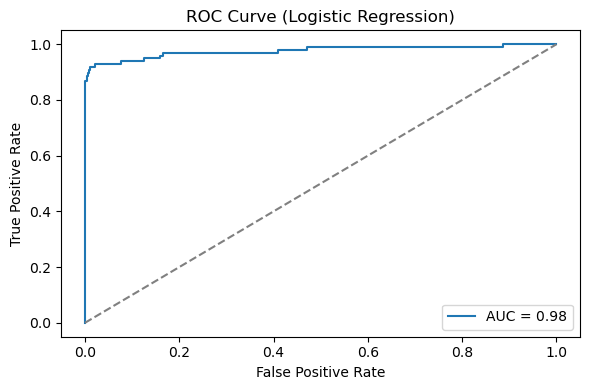

In [83]:
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Logistic Regression)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# pickle

In [94]:
import pickle

In [96]:
pickle.dump(lr,open('logistic_model.pkl','wb'))

In [98]:
model1=pickle.load(open('logistic_model.pkl','rb'))

In [100]:
model1.predict(X_train_scaled)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)